<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/ml06_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 농어(Perch) 무게 예측

*   농어의 모든 특성들을 사용한 무게 예측
*   KNN Regressor vs Linear Regression 비교
*   다항 회귀
*   규제(Regularization)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 준비

In [2]:
file_path = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [3]:
fish = pd.read_csv(file_path)

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
perch = fish[fish.Species == 'Perch']  # 농어 데이터셋

In [6]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


Weight ~ Length + Diagonal + Height + Width

In [9]:
# perch.columns[2:]
X = perch[perch.columns[2:]].values  # 특성(features) 배열

In [10]:
X[:5, :]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316],
       [17.4   , 18.5   ,  4.588 ,  2.9415]])

In [11]:
y = perch['Weight'].values  # 타겟(target) 배열

In [12]:
y[:5]

array([ 5.9, 32. , 40. , 51.5, 70. ])

# 훈련 셋/테스트 셋 나누기

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
X_train.shape

(42, 4)

In [15]:
X_test.shape

(14, 4)

In [17]:
y_train.shape

(42,)

In [18]:
y_test.shape

(14,)

# 1차항만 고려한 회귀

## KNN

In [19]:
knn = KNeighborsRegressor()  # ML 모델 생성

In [20]:
knn.fit(X_train, y_train)  # ML 모델 훈련

KNeighborsRegressor()

In [21]:
train_pred = knn.predict(X_train)  # 훈련 셋 예측값 계산

In [22]:
train_pred[:5]

array([ 87.6, 123. ,  79.6,  70.6, 723. ])

In [23]:
y_train[:5]  # 실젯값(농어의 무게)

array([ 85., 135.,  78.,  70., 700.])

In [24]:
test_pred = knn.predict(X_test)  # 테스트 셋 예측값 계산

In [25]:
test_pred[:5]

array([ 60. ,  79.6, 248. , 122. , 130. ])

In [26]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [27]:
print('훈련 셋 MSE:', mean_squared_error(y_train, train_pred))
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 MSE:', mean_squared_error(y_test, test_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 MSE: 2986.5723809523806
훈련 셋 R2: 0.97579760182756
테스트 셋 MSE: 837.3100000000001
테스트 셋 R2: 0.9916579819676246


KNN 모델은 과소적합.

## Linear Regression

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
$$

선형회귀식에서 예측한 값 $\hat{y}$들의 MSE가 최소가 되는 $w_0$ ~ $w_4$를 찾는 과정.

In [28]:
lin_reg = LinearRegression()  # ML 모델 생성

In [29]:
lin_reg.fit(X_train, y_train)  # ML 모델 훈련

LinearRegression()

In [30]:
lin_reg.coef_

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [31]:
lin_reg.intercept_

np.float64(-610.0275364260515)

무게 = -610 - 40 x Length + 47 x Diagnoal + 67 x Height  + 35 x Width

In [32]:
train_pred = lin_reg.predict(X_train)  # 훈련 셋 예측값 계산

In [33]:
test_pred = lin_reg.predict(X_test)  # 테스트 셋 예측값 계산

In [34]:
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 R2: 0.9567246116638569
테스트 셋 R2: 0.8790465615990273


Linear Regression은 과대적합.

Linear Regression은 KNN보다 오차가 큼.

# 2차항을 고려한 회귀

## KNN

In [35]:
poly = PolynomialFeatures(include_bias=False)
# degree=2(기본값): 2차항까지 고려
# interaction_only=False(기본값): x1^2, ... x4^2, x1 * x2, x1 * x3, ... 2차항들을 고려.
# 만약 interaction_only=True로 설정하면 제곱항들은 무시됨.

In [36]:
scaler = StandardScaler()

In [37]:
knn = KNeighborsRegressor()

In [38]:
pipe = Pipeline(steps=[('poly', poly),
                       ('scaler', scaler),
                       ('knn', knn)])

In [39]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [40]:
pipe['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [41]:
train_pred = pipe.predict(X_train)

In [42]:
train_pred[:5]

array([ 79.6, 130. ,  79.6,  79.6, 666.2])

In [43]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [44]:
test_pred = pipe.predict(X_test)

In [45]:
test_pred[:5]

array([ 61. ,  79.6, 248. , 122. , 130. ])

In [46]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [47]:
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 R2: 0.9852536214139073
테스트 셋 R2: 0.9861441832656344


1차항만 고려한 KNN과 비교하면 훈련 셋의 점수가 좋아졌고, 과소적합의 크기도 줄어듦.

## Linear Regression

$$
\hat{y} = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
 + w_5 \times x_1^2 + w_6 \times x_1 x_2 + \dots + w_{14} \times w_4^2
$$

선형 회귀식 예측값들의 MSE를 최소로 하는 $w_0$ ~ $w_{14}$를 찾는 것.

In [48]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('lin_reg', LinearRegression())])

In [49]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [50]:
# 선형 회귀의 계수들(coefficients)
pipe['lin_reg'].coef_

array([   -443.26816038,    1150.91134799,    -650.22360319,
          -368.62831244,  115424.97558529, -210083.78541693,
        -49872.08633923,   29100.85132271,   91656.18352519,
         53699.90248991,  -27521.03052328,    1226.11352267,
         -5243.73927458,    2288.55011685])

In [51]:
# 선형 회귀의 절편(intercept)
pipe['lin_reg'].intercept_

np.float64(400.833333333325)

In [52]:
pipe['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [54]:
train_pred = pipe.predict(X_train)  # 훈련 셋 예측값

In [56]:
train_pred[:5]

array([ 86.22462498, 117.8371985 ,  65.36623277,  51.32036181,
       688.61814191])

In [57]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [55]:
test_pred = pipe.predict(X_test)  # 테스트 셋 예측값

In [58]:
print('훈련 셋 R2:', r2_score(y_train, train_pred))
print('테스트 셋 R2:', r2_score(y_test, test_pred))

훈련 셋 R2: 0.9920055538341164
테스트 셋 R2: 0.949260960155254


# 규제의 필요성

*   선형 회귀: Weight ~ Length
*   고차항을 포함하는 선형 회귀:
    *   1차항: W ~ L
    *   2차항: W ~ L + L^2
    *   5차항: W ~ L + L^2 + L^3 + L^4 + L^5
    *   50차항: W ~ L + ... + L^50

In [63]:
X = perch[['Length']].values  # 특성 배열
y = perch['Weight'].values  # 타겟 배열

In [67]:
# 훈련/테스트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [68]:
pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                       ('scaler', StandardScaler()),
                       ('reg', LinearRegression())])

In [69]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [70]:
pipe['reg'].coef_

array([340.55381311])

In [71]:
pipe['reg'].intercept_

np.float64(400.83333333333337)

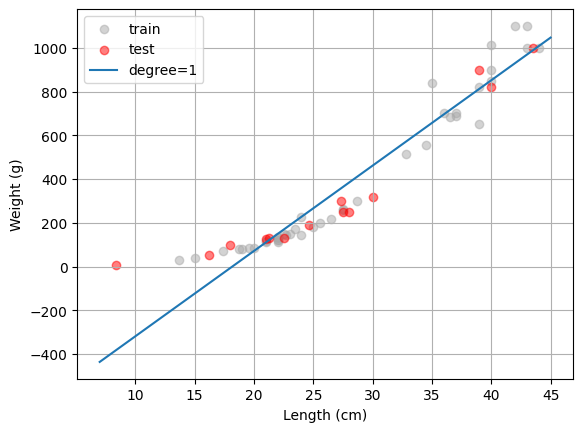

In [78]:
# 훈련 셋 산점도(무게 ~ 길이)
plt.scatter(X_train, y_train, color='DarkGray', alpha=0.5, label='train')

# 테스트 셋 산점도
plt.scatter(X_test, y_test, color='Red', alpha=0.5, label='test')

# 선형 회귀 직선 선그래프
x_vals = np.arange(7, 45, 0.001).reshape((-1, 1))
y_vals = pipe.predict(x_vals)  # y = w0 + w1 x x
plt.plot(x_vals, y_vals, label='degree=1')

plt.legend()
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

----- degree = 1 -----
훈련 셋 MSE = 7422.953552609778
테스트 셋 MSE = 17590.265977889165
----- degree = 2 -----
훈련 셋 MSE = 3617.9917403639633
테스트 셋 MSE = 2248.9974694392554
----- degree = 5 -----
훈련 셋 MSE = 3216.6113933040733
테스트 셋 MSE = 1753.0984158595472
----- degree = 50 -----
훈련 셋 MSE = 1242.3671485244474
테스트 셋 MSE = 7683897194550.778


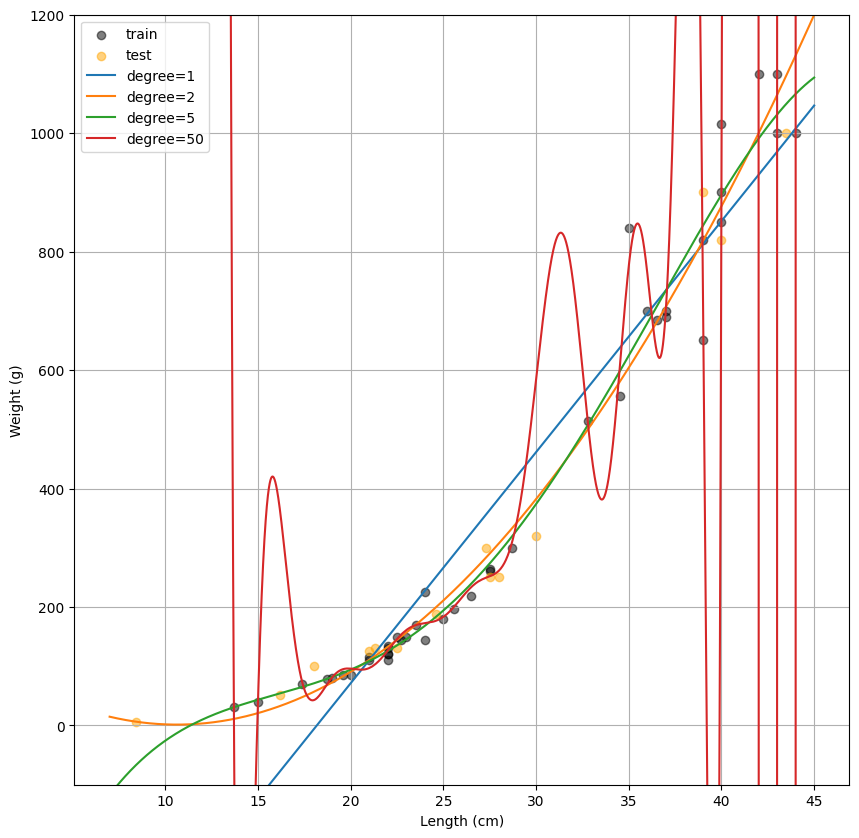

In [88]:
plt.figure(figsize=(10, 10))

# 훈련 셋 산점도
plt.scatter(X_train, y_train, color='black', alpha=0.5, label='train')

# 테스트 셋 산점도
plt.scatter(X_test, y_test, color='orange', alpha=0.5, label='test')

# PolynomialFeatures에서 사용할 degree(차수) 값들
degrees = (1, 2, 5, 50)
for d in degrees:
    # Pipeline 객체 생성
    pipe = Pipeline(steps=[('poly', PolynomialFeatures(degree=d, include_bias=False)),
                           ('scaler', StandardScaler()),
                           ('reg', LinearRegression())])
    # 훈련 셋으로 ML 모델 훈련
    pipe.fit(X_train, y_train)

    # 훈련 셋/테스트 셋 MSE 출력
    print(f'----- degree = {d} -----')
    train_pred = pipe.predict(X_train)
    print('훈련 셋 MSE =', mean_squared_error(y_train, train_pred))
    test_pred = pipe.predict(X_test)
    print('테스트 셋 MSE =', mean_squared_error(y_test, test_pred))

    # 회귀 식을 시각화하기 위해서
    x_vals = np.arange(7, 45, 0.001).reshape((-1, 1))  # 회귀식 시각화를 위한 x좌표들
    y_vals = pipe.predict(x_vals)  # 회귀식 시각화를 위한 y좌표들
    plt.plot(x_vals, y_vals, label=f'degree={d}')  # 선그래프

plt.legend()
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.ylim((-100, 1200))  # y축을 그릴 범위를 제한
plt.show()